In [1]:
from sotip import *
import numpy as np
import scanpy as sc


In [14]:
adata_sotip

AnnData object with n_obs × n_vars = 6643 × 37
    obs: 'SampleID', 'cellLabelInImage', 'cellSize', 'C', 'Na', 'Si', 'P', 'Ca', 'Fe', 'Background', 'B7H3', 'OX40', 'CD163', 'CSF-1R', 'Ta', 'Au', 'tumorYN', 'tumorCluster', 'Group', 'immuneCluster', 'immuneGroup', 'group_name', 'immuneGroup_name', 'all_group_name', 'ME_heter_all_group_name_uniform', 'ME_heter_all_group_name_paga_guided_umap', 'leiden_EMD', 'leiden_EMD_merge', 'min_dist_to_immune', 'min_dist_to_tumor', 'boundary'
    var: 'sotip_polar_in_tumor', 'sotip_polar_in_tumor_bh', 'sotip_polar_in_immune', 'sotip_polar_in_immune_bh', 'gt_polarized_tumor', 'gt_polarized_immune'
    uns: 'boundary_colors', 'leiden_EMD_merge_colors'
    obsm: 'ME', 'X_umap', 'X_umap_EMD', 'spatial'
    obsp: 'ME_EMD_mat', 'connectivities', 'distances'

In [2]:
adata_sotip = sc.read_h5ad('sotip_polar_test_p4.h5ad')

In [3]:
adata_spagcn = sc.read_h5ad('spagcn_polar_test_p4.h5ad')

In [10]:
sotip_sorted_tumor = adata_sotip.var.sort_values(by='sotip_polar_in_tumor_bh')

In [11]:
sotip_sorted_immune = adata_sotip.var.sort_values(by='sotip_polar_in_immune_bh')

In [12]:
sotip_sorted_tumor

,sotip_polar_in_tumor,sotip_polar_in_tumor_bh,sotip_polar_in_immune,sotip_polar_in_immune_bh,gt_polarized_tumor,gt_polarized_immune
HLA_Class_1,1.892732e-79,7.003108e-78,2.774845e-02,4.666785e-02,0.0,0.0
Keratin6,7.245791e-57,1.340471e-55,7.106318e-01,8.216681e-01,1.0,0.0
Keratin17,1.760632e-49,2.171446e-48,8.398746e-01,9.416776e-01,1.0,0.0
HLA-DR,4.913569e-48,4.545051e-47,2.800463e-11,1.151301e-10,1.0,1.0
PD-L1,6.983816e-19,5.168024e-18,2.121991e-02,3.738746e-02,1.0,1.0
phospho-S6,2.153293e-16,1.327864e-15,4.052990e-05,1.071147e-04,0.0,0.0
CD11c,3.433276e-11,1.814731e-10,2.017178e-20,2.487853e-19,0.0,1.0
CD4,6.057806e-11,2.801735e-10,1.609571e-14,1.191083e-13,0.0,1.0
H3K9ac,1.238124e-09,5.090065e-09,9.939737e-13,4.597128e-12,0.0,0.0
EGFR,1.744595e-08,6.455002e-08,5.896350e-01,7.537937e-01,1.0,0.0


In [13]:
sotip_sorted_immune

,sotip_polar_in_tumor,sotip_polar_in_tumor_bh,sotip_polar_in_immune,sotip_polar_in_immune_bh,gt_polarized_tumor,gt_polarized_immune
CD138,6.981529e-01,8.142698e-01,1.384718e-28,5.123456e-27,0.0,0.0
CD45RO,5.970055e-07,2.008109e-06,5.640793e-23,1.043547e-21,0.0,1.0
CD11c,3.433276e-11,1.814731e-10,2.017178e-20,2.487853e-19,0.0,1.0
H3K27me3,1.411621e-01,2.748946e-01,4.869371e-15,4.504169e-14,0.0,0.0
CD4,6.057806e-11,2.801735e-10,1.609571e-14,1.191083e-13,0.0,1.0
Beta catenin,8.300169e-04,1.919414e-03,3.418379e-13,2.108000e-12,1.0,0.0
Vimentin,7.087574e-07,2.185335e-06,6.608973e-13,3.493314e-12,0.0,0.0
H3K9ac,1.238124e-09,5.090065e-09,9.939737e-13,4.597128e-12,0.0,0.0
HLA-DR,4.913569e-48,4.545051e-47,2.800463e-11,1.151301e-10,1.0,1.0
CD45,3.589000e-03,7.377388e-03,3.507578e-10,1.297804e-09,0.0,0.0


In [7]:
polar_sotip = adata_sotip.var[['sotip_polar_in_tumor_bh','sotip_polar_in_immune_bh','gt_polarized_tumor','gt_polarized_immune']]



In [21]:
sotip_index_lower = polar_sotip.index.str.lower()
polar_sotip.index = sotip_index_lower

In [23]:
spagcn_index_lower = polar_spagcn.index.str.lower()
polar_spagcn.index = spagcn_index_lower

In [24]:
polar_join = polar_sotip.join(polar_spagcn)

In [27]:
polar_join.columns

Index(['sotip_polar_in_tumor_bh', 'sotip_polar_in_immune_bh',
       'gt_polarized_tumor', 'gt_polarized_immune', 'spagcn_polar_in_tumor_bh',
       'spagcn_polar_in_immune_bh'],
      dtype='object')

# polar in tumor

In [28]:
fdr_array = np.arange(0,0.5,0.01)
pd_dict = {
    'fdr':[],
    'power':[],
    'method':[]
}
gt_polar_count = np.sum(polar_join['gt_polarized_tumor'])
for fdr in fdr_array:
    sotip_polar_count = np.sum(polar_join[polar_join['sotip_polar_in_tumor_bh']<=fdr]['gt_polarized_tumor'])
    spagcn_polar_count = np.sum(polar_join[polar_join['spagcn_polar_in_tumor_bh']<=fdr]['gt_polarized_tumor'])  
    
    sotip_power = sotip_polar_count/gt_polar_count
    spagcn_power = spagcn_polar_count/gt_polar_count
    pd_dict['fdr'].append(fdr)
    pd_dict['power'].append(sotip_power)    
    pd_dict['method'].append('sotip')    
    
    pd_dict['fdr'].append(fdr)
    pd_dict['power'].append(spagcn_power)    
    pd_dict['method'].append('spagcn')    
pd_df = pd.DataFrame(pd_dict)

Text(0.5, 1.0, 'MIBI_p4_tumor')

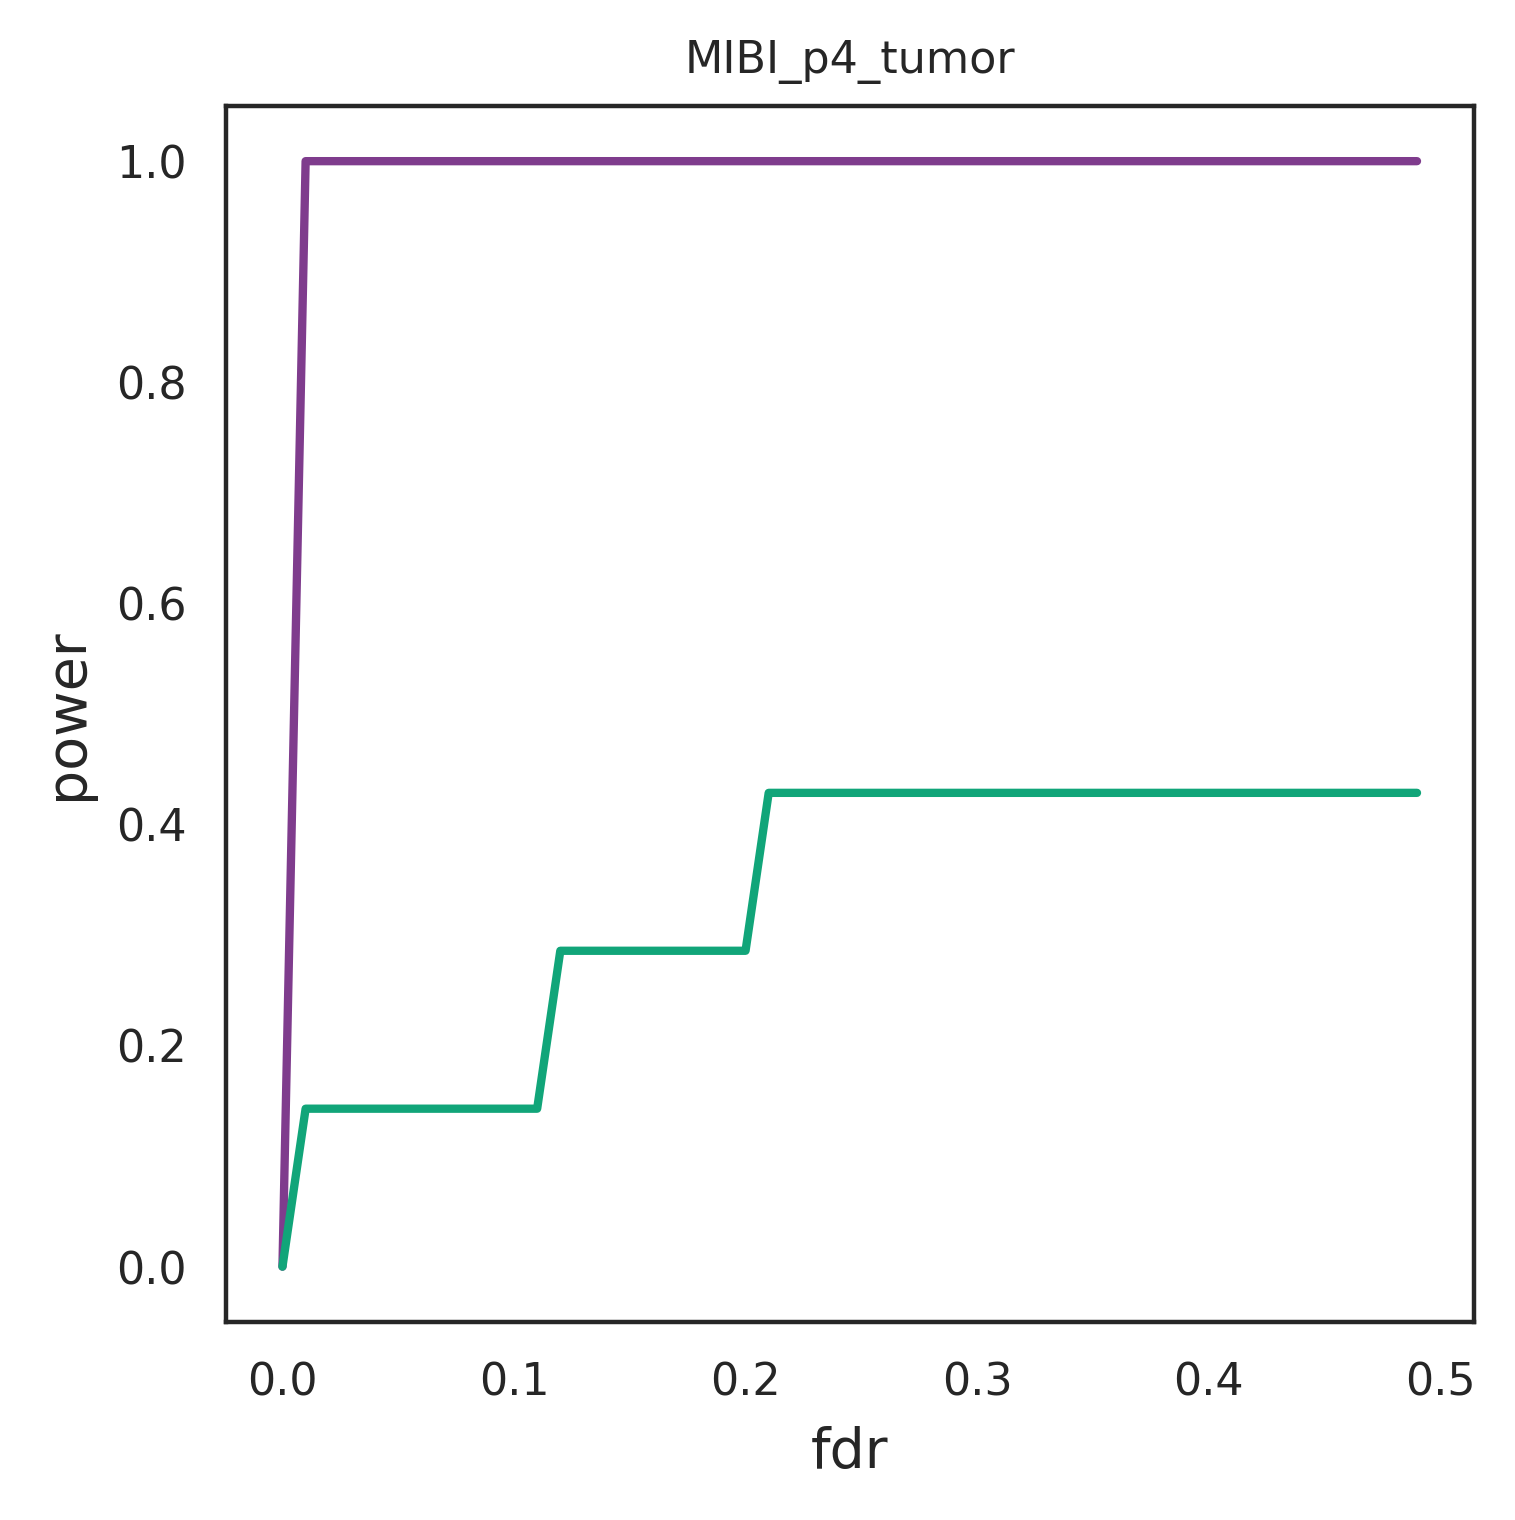

In [30]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors[0:2]

g = sns.lineplot(data=pd_df,x='fdr',y='power',hue='method',palette=cmp)
g.legend_.remove()
plt.title('MIBI_p4_tumor')

# polar in immune

In [31]:
fdr_array = np.arange(0,0.5,0.01)
pd_dict = {
    'fdr':[],
    'power':[],
    'method':[]
}
gt_polar_count = np.sum(polar_join['gt_polarized_immune'])
for fdr in fdr_array:
    sotip_polar_count = np.sum(polar_join[polar_join['sotip_polar_in_immune_bh']<=fdr]['gt_polarized_immune'])
    spagcn_polar_count = np.sum(polar_join[polar_join['spagcn_polar_in_immune_bh']<=fdr]['gt_polarized_immune'])  
    
    sotip_power = sotip_polar_count/gt_polar_count
    spagcn_power = spagcn_polar_count/gt_polar_count
    pd_dict['fdr'].append(fdr)
    pd_dict['power'].append(sotip_power)    
    pd_dict['method'].append('sotip')    
    
    pd_dict['fdr'].append(fdr)
    pd_dict['power'].append(spagcn_power)    
    pd_dict['method'].append('spagcn')    
pd_df = pd.DataFrame(pd_dict)

Text(0.5, 1.0, 'MIBI_p4_immune')

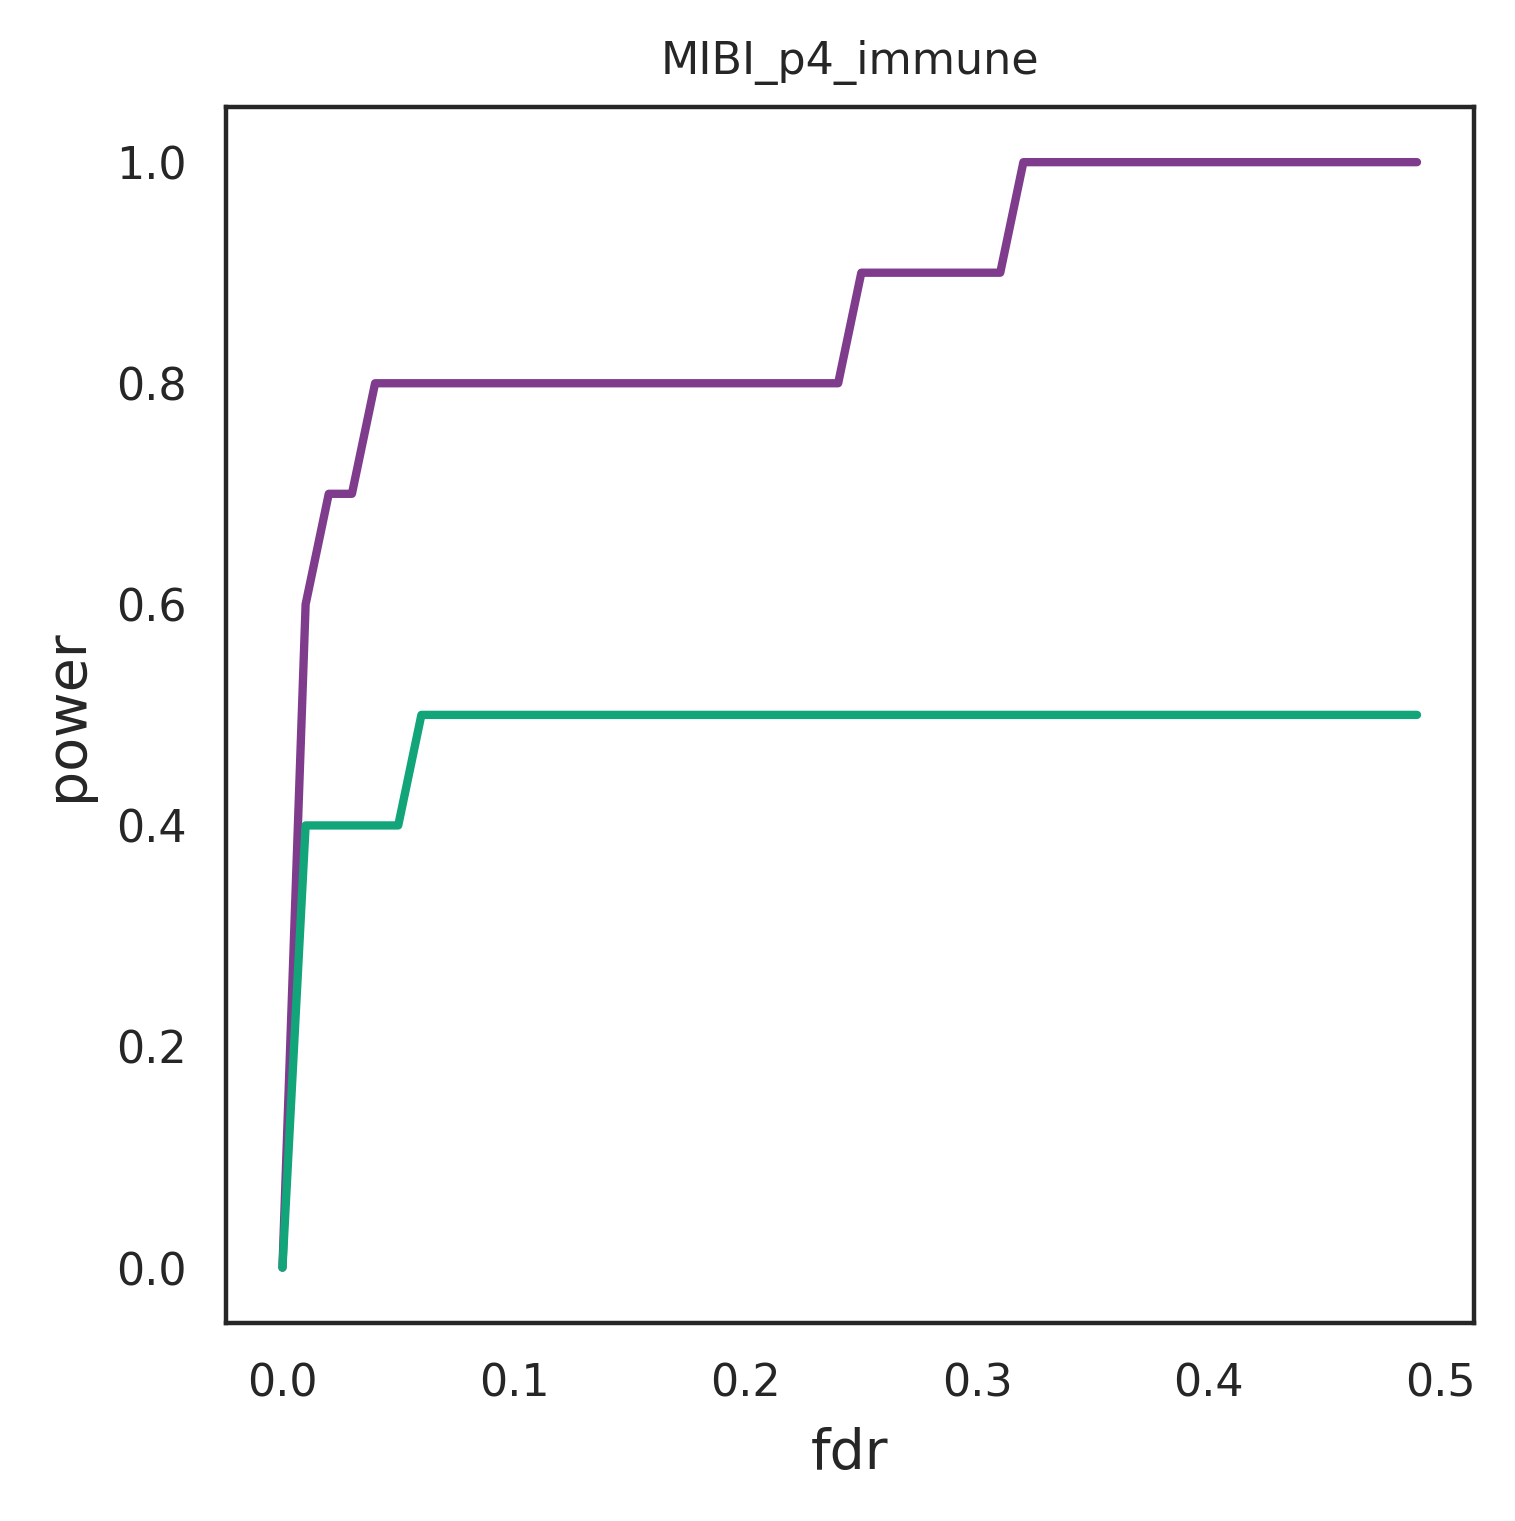

In [33]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors[0:2]

g = sns.lineplot(data=pd_df,x='fdr',y='power',hue='method',palette=cmp)
g.legend_.remove()
plt.title('MIBI_p4_immune')